In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset
df = pd.read_excel('C:/Users/nilesh/Downloads/Toyota_excel.xlsx')

In [ ]:
df.replace('??',pd.NA, inplace=True)
df.replace('????', pd.NA, inplace= True)

numeric_columns= ['Age', 'KM', 'HP', 'Weight', 'CC','Doors']
for col in numeric_columns:
    df[col]=pd.to_numeric(df[col],errors='coerce')


#Display the clean datasets
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,NaN,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3.0,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3.0,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3.0,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3.0,1170


In [ ]:
# Fill missing numerical values with median
df['KM'].fillna(df['KM'].median(), inplace=True)
df['HP'].fillna(df['HP'].median(), inplace=True)
# Handle categorical data in 'FuelType' and 'Doors'
df['FuelType'].fillna(df['FuelType'].mode()[0], inplace=True)
# Replace string values in 'Doors' with numeric equivalents
df['Doors'].replace({'three': 3, 'four': 4, '5': 5}, inplace=True)
# Convert 'Doors' to a numeric column (in case any other strings are there)
df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce')
# Fill missing values in 'Doors' with the median
df['Doors'].fillna(df['Doors'].median(), inplace=True)

# Fill any remaining missing values in other columns
df.fillna(0, inplace=True)

In [ ]:
# Check the data types of each column in the DataFrame
print(df.dtypes)

Price          int64
Age          float64
KM           float64
FuelType      object
HP           float64
MetColor     float64
Automatic      int64
CC             int64
Doors        float64
Weight         int64
dtype: object


In [ ]:
# Encoding categorical variables
label_encoder= LabelEncoder()
df['FuelType']= label_encoder.fit_transform(df['FuelType'])

In [ ]:
# Difine the feature set X and target y
X= df.drop(['Price'],axis=1)
y= df['Price']

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Initialize and train the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predict the prices for test data
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Predictions on both training and test sets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Evaluate the model on the training set
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
r2_train = rf_regressor.score(X_train, y_train)
# Evaluate the model on the test set
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_test = rf_regressor.score(X_test, y_test)
# Print the evaluation metrics for both sets
print("Training Set Performance:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R2 Score: {r2_train}")
print("\nTest Set Performance:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R2 Score: {r2_test}")

# Analysis
if r2_train > r2_test:
    print("\nThe model may be overfitting.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is performing reasonably well.")

Training Set Performance:
Mean Squared Error: 200138.787288676
Mean Absolute Error: 327.4093554006969
R2 Score: 0.9847146456911071

Test Set Performance:
Mean Squared Error: 1279494.921523264
Mean Absolute Error: 873.5175347222222
R2 Score: 0.9041058854703208

The model may be overfitting.


In [ ]:
# Refit the model if necessary and get feature importances
importances = rf_regressor.feature_importances_

# Combine and sort feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))

     Feature  Importance
0        Age    0.577605
8     Weight    0.272990
1         KM    0.105649
3         HP    0.020108
7      Doors    0.006220
6         CC    0.005570
2   FuelType    0.005229
4   MetColor    0.004976
5  Automatic    0.001652


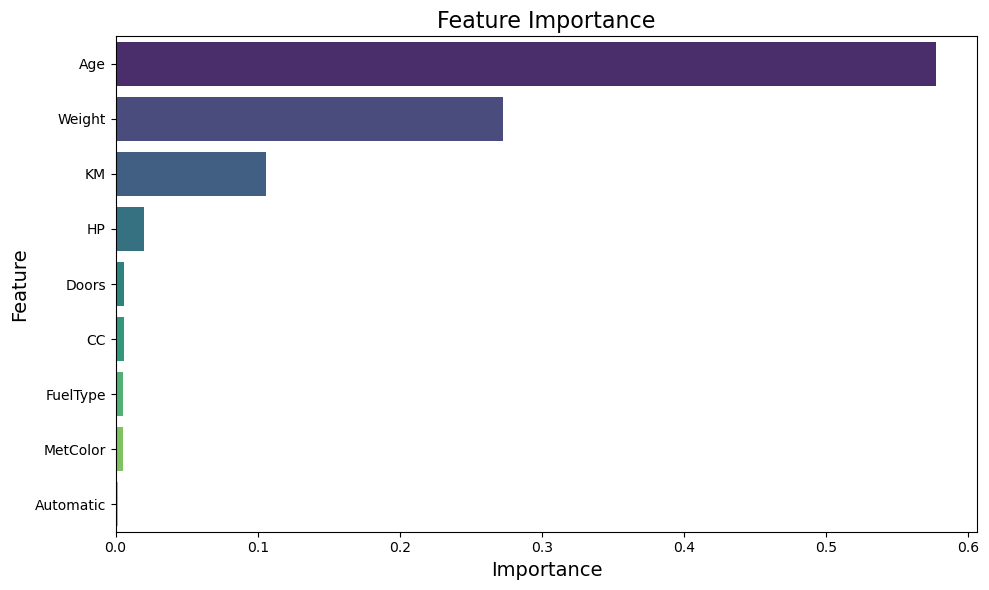

In [ ]:
# sort the feature importance in descending order
importance_df= importance_df.sort_values(by='Importance',ascending=False)

#plot the feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y= 'Feature', data= importance_df, palette='viridis')

# Add a title and labels
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# # # Drop less important features
X_reduced = X.drop(['Automatic', 'MetColor', 'FuelType', 'CC'], axis=1)

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [2,3,5, 10, 15],
'min_samples_split': [2, 3, 5, 10],
'min_samples_leaf': [2, 4],
'max_features': ['sqrt', 'log2']
}
# Initialize the RandomForestRegressor
rf = RandomForestRegressor()
# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2, scoring='r2')
# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score from the grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score from CV: {grid_search.best_score_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best R2 Score from CV: 0.8820037600701497


In [ ]:
# Use the best estimator to make predictions on the train and test set
best_rf = grid_search.best_estimator_
# Make predictions
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Calculate metrics for training set
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)

# Calculate metrics for test set
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Set Performance:")
print(f"R2 Score: {r2_train}")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print("\nTest Set Performance:")
print(f"R2 Score: {r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")

# Analysis
if r2_train > r2_test:
    print("\nThe model may be overfitting.")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nThe model may be underfitting.")
else:
    print("\nThe model is performing reasonably well.")

Training Set Performance:
R2 Score: 0.9532867560933107
Mean Absolute Error (MAE): 573.3137987351513
Mean Squared Error (MSE): 611639.8610639769

Test Set Performance:
R2 Score: 0.9093414382659246
Mean Absolute Error (MAE): 823.783898955196
Mean Squared Error (MSE): 1209638.04609147

The model may be overfitting.
